### Use of default dataset from Seaborn

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [15]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 2000x800 with 0 Axes>

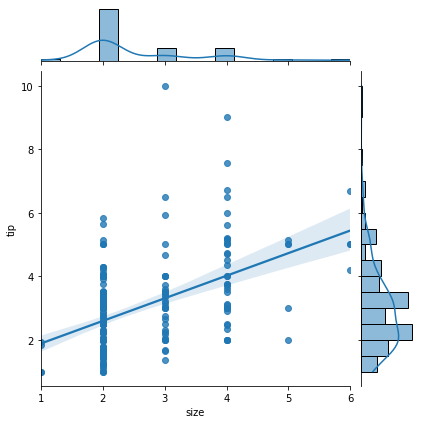

In [16]:
plt.figure(figsize=(10,4), dpi=200)
sns.jointplot(x="size", y="tip", data=tips_df, palette="warm", kind="reg")
plt.savefig("try.png")

In [9]:
crash_df = sns.load_dataset("car_crashes")
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


<Figure size 576x288 with 0 Axes>

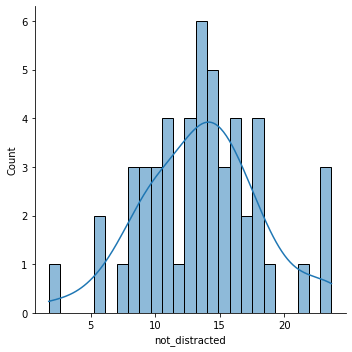

<Figure size 576x288 with 0 Axes>

In [17]:
sns.displot(crash_df.not_distracted, kde=True, bins=25)
plt.figure(figsize=(8,4))

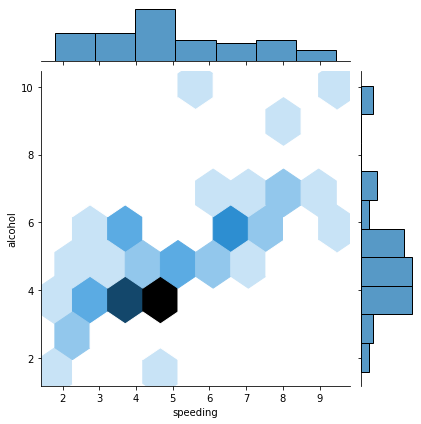

In [18]:
sns.jointplot(x="speeding", y="alcohol", data=crash_df, kind="hex")

Text(0.5, 1.0, 'KDE over Alcohol Driving')

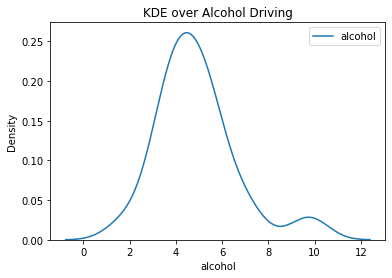

In [19]:
sns.kdeplot(crash_df.alcohol, label="alcohol")
plt.legend()
plt.title("KDE over Alcohol Driving")

<AxesSubplot:xlabel='tip'>

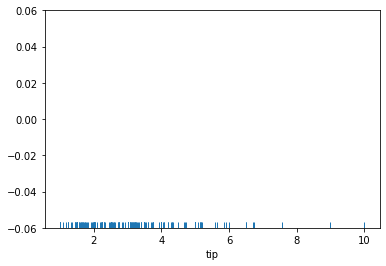

In [20]:
sns.rugplot(tips_df.tip, palette="Blues")

<Figure size 576x288 with 0 Axes>

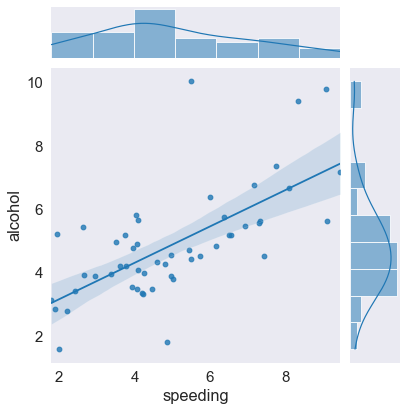

In [21]:
sns.set_style("dark")
plt.figure(figsize=(8,4))
sns.set_context("paper", font_scale=1.7)
sns.jointplot(x="speeding",y="alcohol", data=crash_df, kind="reg")
sns.despine(left=True, bottom=True)


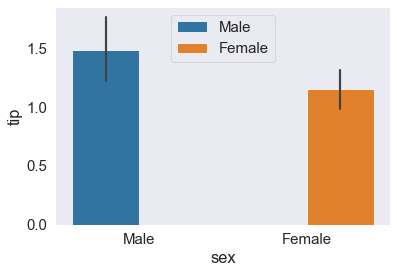

In [22]:
sns.barplot(x="sex",y="tip", data=tips_df, hue="sex", estimator=np.std)
plt.legend(loc=9)
sns.set_context("paper", font_scale=1.7)

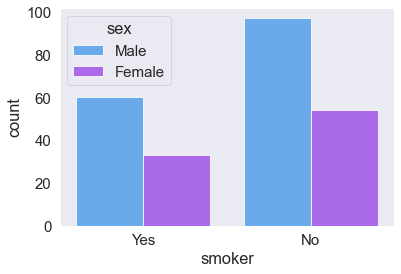

In [23]:
sns.countplot(x="smoker", data=tips_df, hue="sex", palette="cool")
sns.set_context("paper", font_scale=1.4)


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

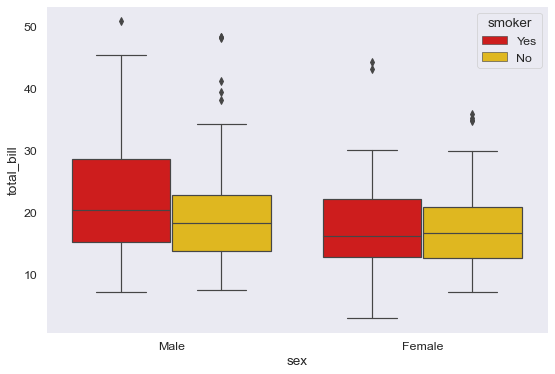

In [24]:
plt.figure(figsize=(9,6))
sns.boxplot(x="sex", y="total_bill", data=tips_df, hue="smoker", palette="hot")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

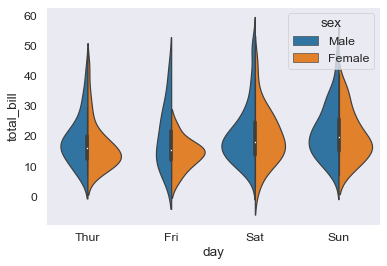

In [25]:
sns.violinplot(x="day",y="total_bill", data=tips_df, hue="sex", split=True)

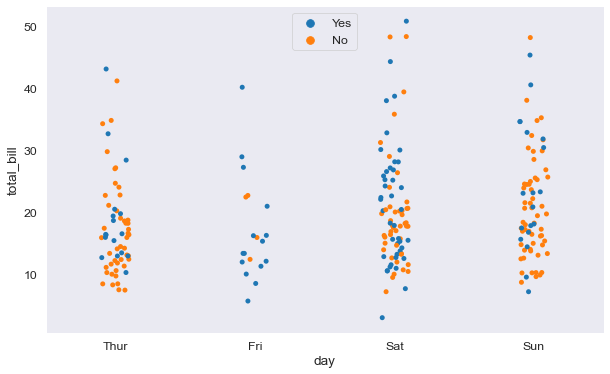

In [26]:
plt.figure(figsize=(10,6))
sns.stripplot(x="day", y="total_bill", data=tips_df, hue="smoker") #dodge=True to seperate them(smoker/non-smokerb)
plt.legend(loc=9)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

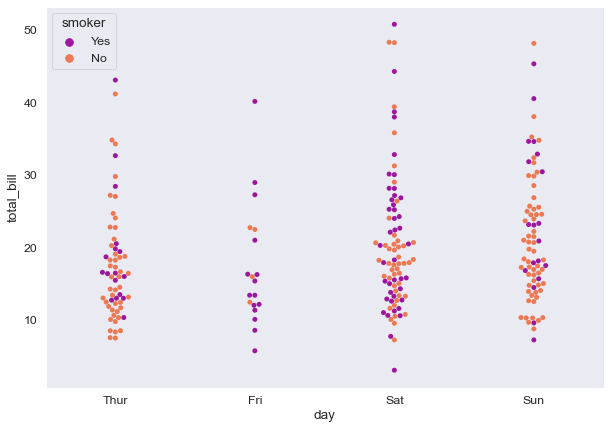

In [27]:
sns.set_style("dark")
plt.figure(figsize=(10,7))
sns.swarmplot(x="day",y="total_bill", data=tips_df, hue="smoker", palette="plasma")


## Matrix Plots

### Heatmaps

In [28]:
crash_df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [29]:
crash_mx = crash_df.corr() #converter to a matrix df
crash_mx

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
total,1.000000,0.611548,0.852613,0.827560,0.956179,-0.199702,-0.036011
speeding,0.611548,1.000000,0.669719,0.588010,0.571976,-0.077675,-0.065928
alcohol,0.852613,0.669719,1.000000,0.732816,0.783520,-0.170612,-0.112547
not_distracted,0.827560,0.588010,0.732816,1.000000,0.747307,-0.174856,-0.075970
no_previous,0.956179,0.571976,0.783520,0.747307,1.000000,-0.156895,-0.006359
ins_premium,-0.199702,-0.077675,-0.170612,-0.174856,-0.156895,1.000000,0.623116
ins_losses,-0.036011,-0.065928,-0.112547,-0.075970,-0.006359,0.623116,1.000000


<AxesSubplot:>

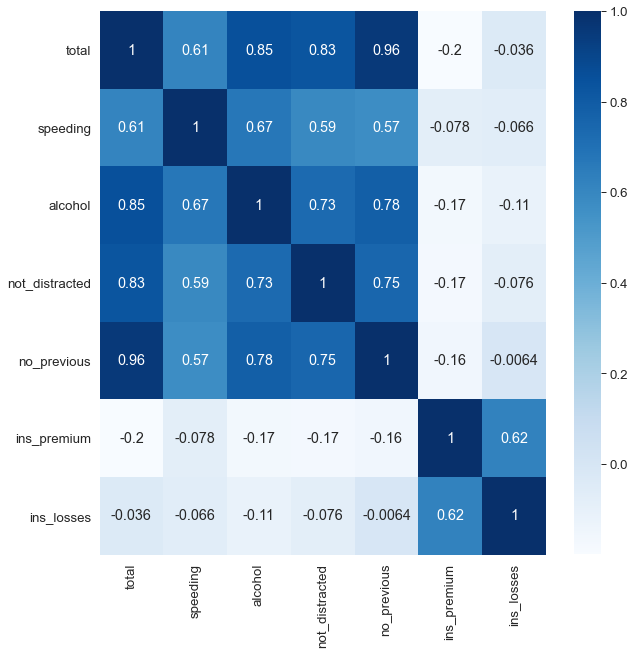

In [30]:
plt.figure(figsize=(10,10))
sns.set_context("paper", font_scale=1.5)
sns.heatmap(crash_mx, annot=True, cmap="Blues")

In [31]:
flight_df = sns.load_dataset("flights")
flight_df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [32]:
flight_mx = flight_df.pivot_table(index="month", columns="year", values="passengers")
flight_mx

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


<AxesSubplot:xlabel='year', ylabel='month'>

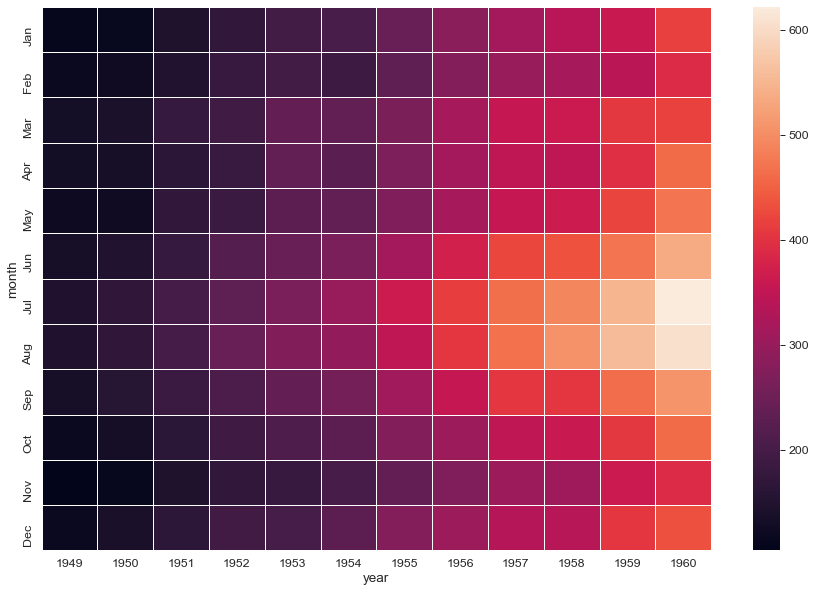

In [33]:
plt.figure(figsize=(15,10))
sns.set_context("paper", font_scale=1.4)
sns.heatmap(flight_mx, linecolor="white", linewidth=1)

### Cluster map

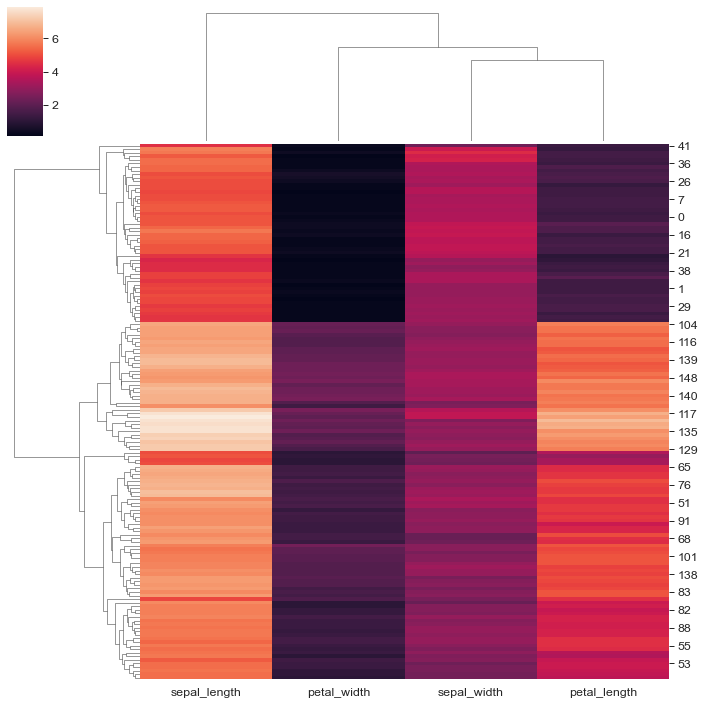

In [34]:
iris_df = sns.load_dataset("iris")
species = iris_df.pop("species")
sns.clustermap(iris_df)

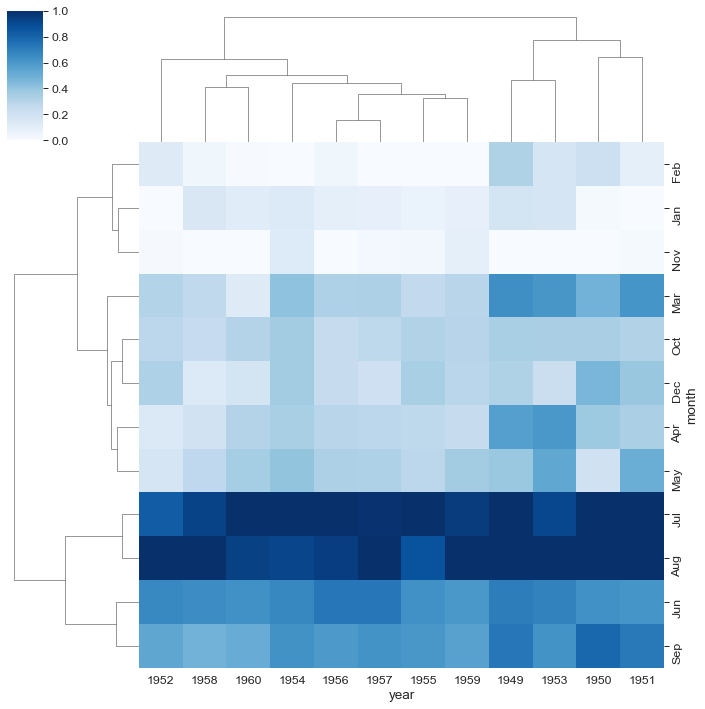

In [35]:
sns.clustermap(flight_mx, cmap="Blues", standard_scale=1)

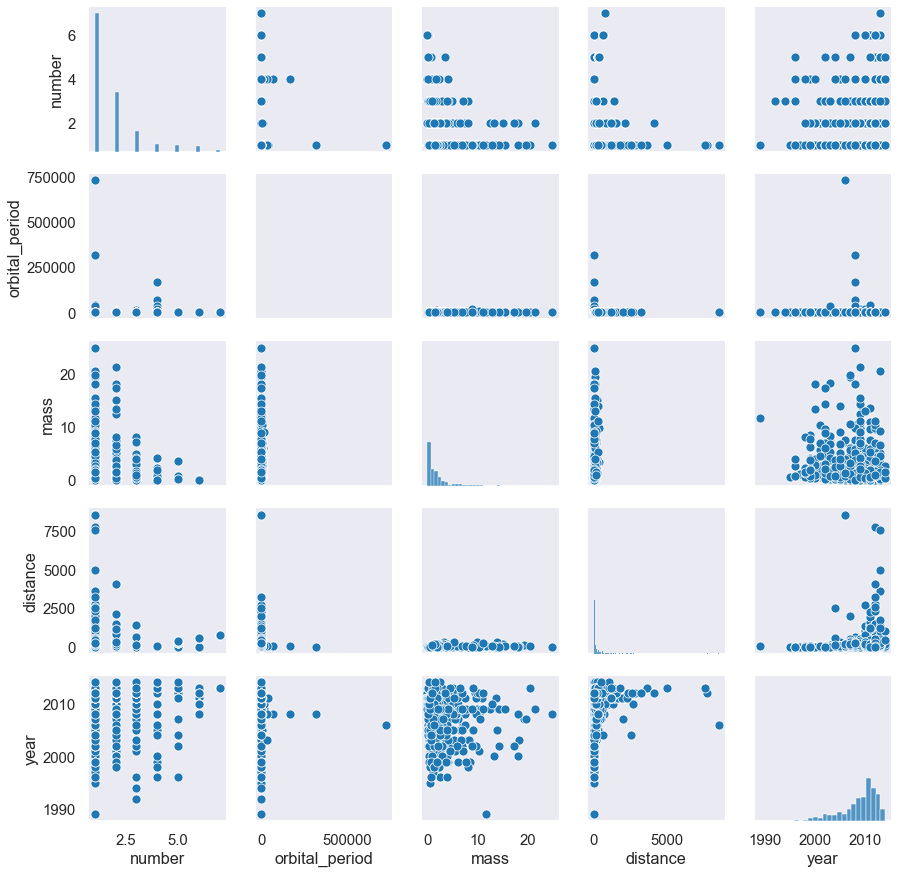

In [47]:
sns.set_context("talk", font_scale=0.9)
planet_df = sns.load_dataset("planets")
planet_g = sns.PairGrid(planet_df)
planet_g.map_diag(sns.histplot)
planet_g.map_offdiag(sns.scatterplot)

<Figure size 720x720 with 0 Axes>

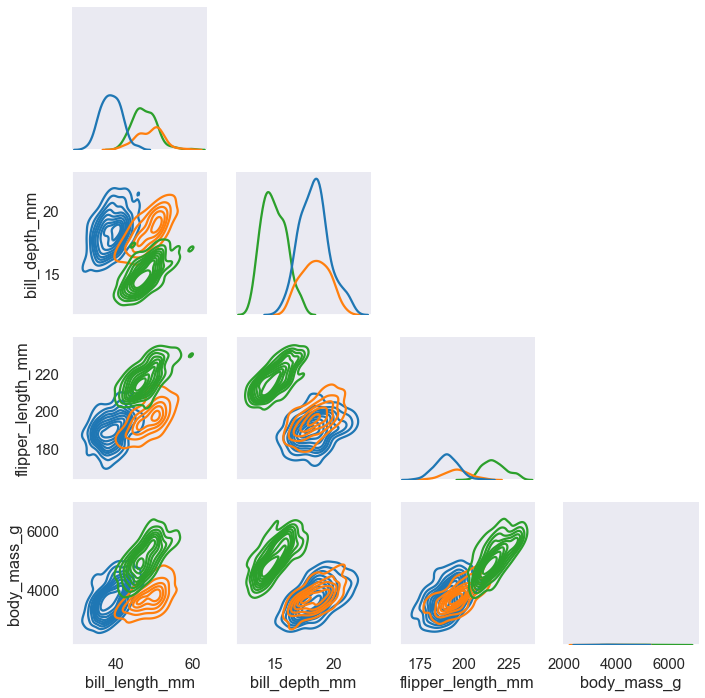

In [51]:
sns.set_style("dark")
plt.figure(figsize=(10,10))
penguin_df = sns.load_dataset("penguins")
peg_g = sns.PairGrid(penguin_df, corner=True, hue="species")
peg_g.map_lower(sns.kdeplot)
peg_g.map_diag(sns.kdeplot)

<Figure size 720x720 with 0 Axes>

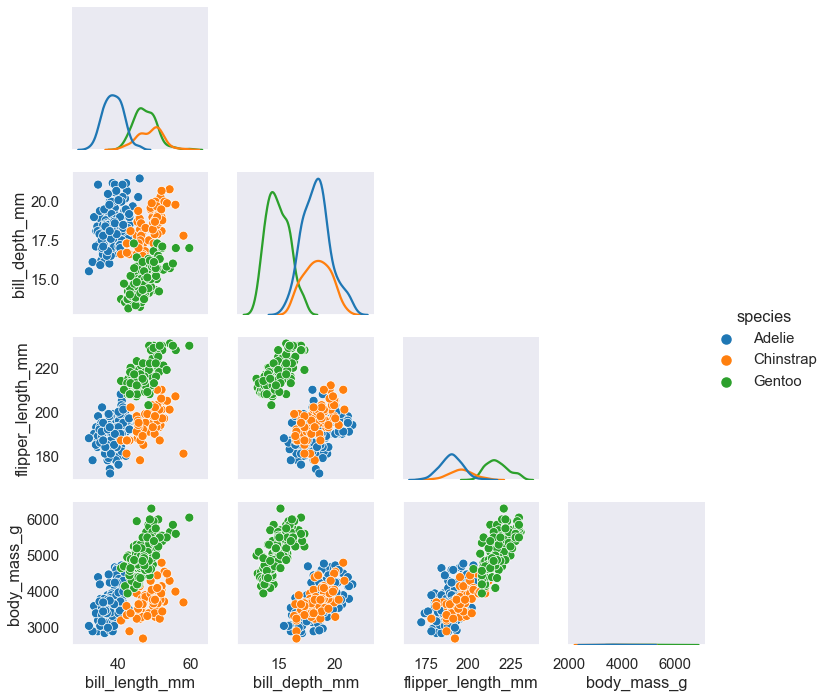

In [57]:
sns.set_style("dark")
plt.figure(figsize=(10,10))
penguin_df = sns.load_dataset("penguins")
peg_g = sns.PairGrid(penguin_df, corner=True, hue="species")
peg_g.map_lower(sns.scatterplot)
peg_g.map_diag(sns.kdeplot)
peg_g.add_legend()

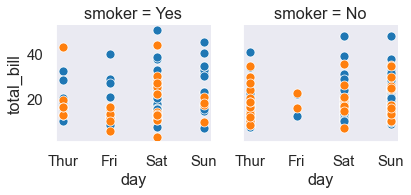

In [60]:
tips_fg = sns.FacetGrid(tips_df, col="smoker", hue="sex")
tips_fg.map(sns.scatterplot, "day", "total_bill")

c:\users\acer\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


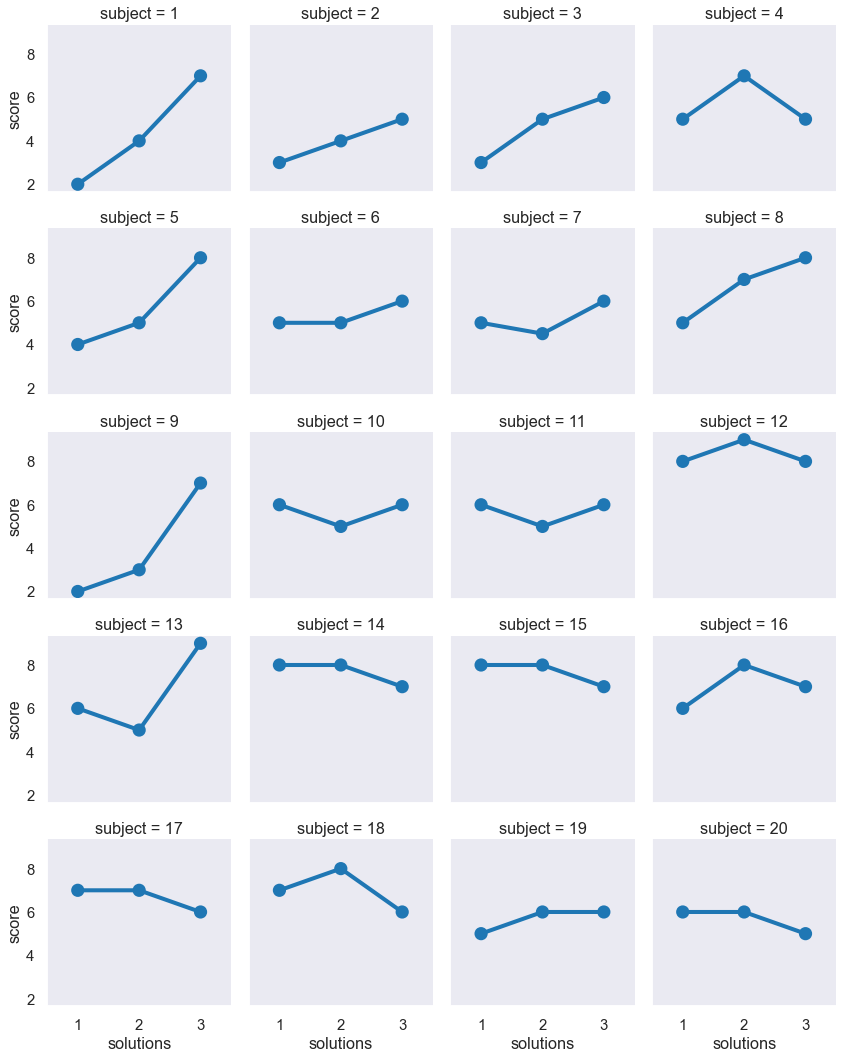

In [70]:
attend_df = sns.load_dataset("attention")
attend_fg = sns.FacetGrid(attend_df, col="subject", col_wrap=4)
attend_fg.map(sns.pointplot, "solutions", "score")

## Regression Plot

In [71]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 720x576 with 0 Axes>

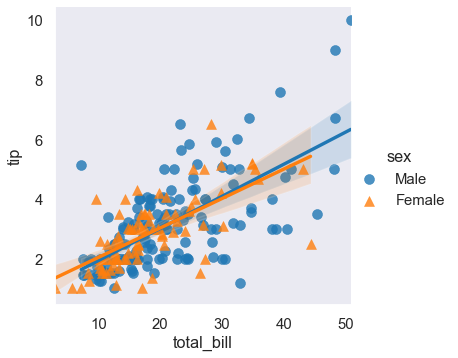

In [76]:
sns.set_style("dark")
plt.figure(figsize=(10,8))
sns.lmplot(x="total_bill", y="tip", data=tips_df, hue="sex", markers=["o","^"], scatter_kws={"s":100, "linewidth":0.5})

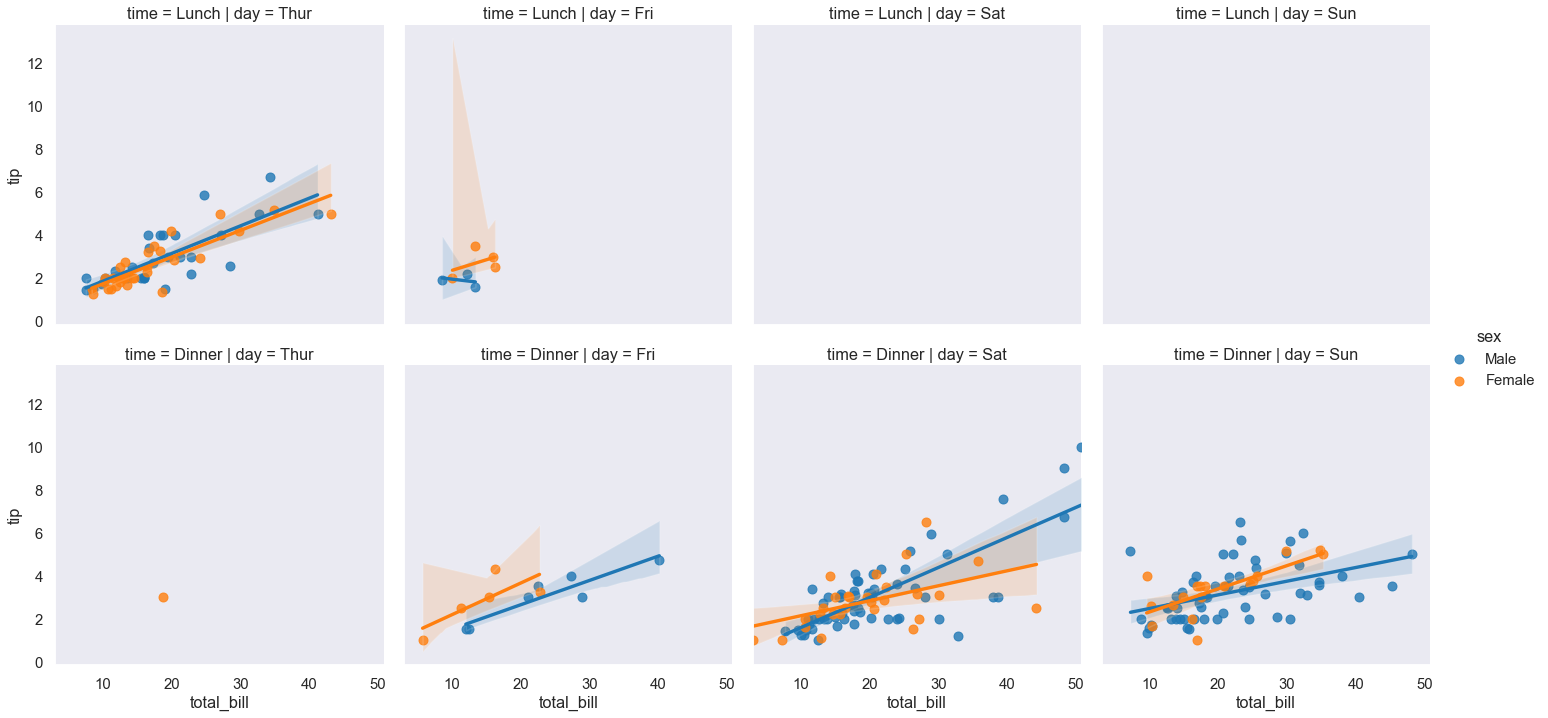

In [78]:
sns.lmplot(x="total_bill", y="tip", hue="sex", col="day", row="time", data=tips_df)